<a href="https://colab.research.google.com/github/agarwalharshprakash/Music-Genre-Classification/blob/master/Music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music genre classification notebook

## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

## Extracting music and features

### Dataset

We use [GTZAN genre collection](http://marsyasweb.appspot.com/download/data_sets/) dataset for classification. 
<br>
<br>
The dataset consists of 10 genres i.e
 * Blues
 * Classical
 * Country
 * Disco
 * Hiphop
 * Jazz
 * Metal
 * Pop
 * Reggae
 * Rock
 
Each genre contains 100 songs. Total dataset: 1000 songs

## Extracting the Spectrogram for every Audio

TypeError: ignored

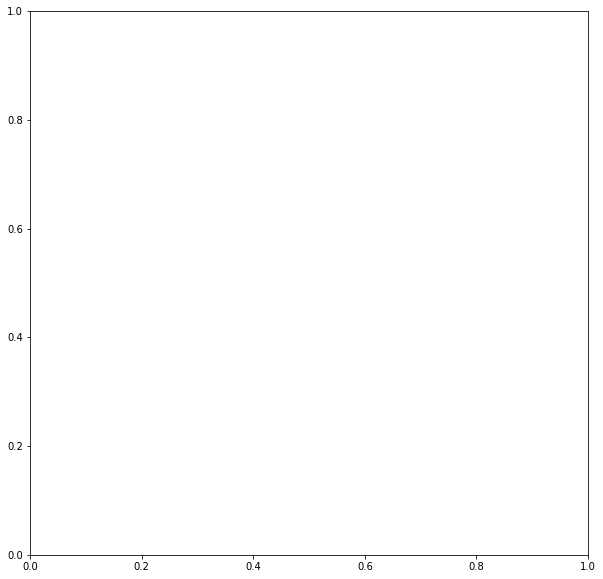

In [ ]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'/content/gdrive/My Drive/Music Genre Classification/Data/genres_original/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/gdrive/My Drive/Music Genre Classification/Data/genres_original/{g}'):
        songname = f'/content/gdrive/My Drive/Music Genre Classification/Data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname)
        plt.specgram(y)
        plt.axis('off')
        plt.savefig(f'/content/gdrive/My Drive/Music Genre Classification/Data/images_original/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()
 

All the audio files get converted into their respective spectrograms .WE can noe easily extract features from them.

## Extracting features from Spectrogram


We will extract

* Mel-frequency cepstral coefficients (MFCC)(20 in number)
* Spectral Centroid,
* Zero Crossing Rate
* Chroma Frequencies
* Spectral Roll-off.

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

## Writing data to csv file

We write the data to a csv file 

In [ ]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./MIR/genres/{g}'):
        songname = f'./MIR/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

The data has been extracted into a [data.csv](https://github.com/parulnith/Music-Genre-Classification-with-Python/blob/master/data.csv) file.

# Analysing the Data in Pandas

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843071,18.620984,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,...,7.457218,-10.470444,-2.360483,-6.783624,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [ ]:
data.shape

(1000, 28)

In [ ]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

## Encoding the Labels

In [ ]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

## Scaling the Feature columns

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

## Dividing data into training and Testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(y_train)

800

In [ ]:
len(y_test)

200

In [ ]:
X_train[10]

array([-0.9149113 ,  0.18294103, -1.10587131, -1.3875197 , -1.14640873,
       -0.97232926, -0.29174214,  1.20078936, -0.68458101, -0.55849017,
       -1.27056582, -0.88176926, -0.74844069, -0.40970382,  0.49685952,
       -1.12666045,  0.59501437, -0.39783853,  0.29327275, -0.72916871,
        0.63015786, -0.91149976,  0.7743942 , -0.64790051,  0.42229852,
       -1.01449461])

# Classification with Keras

## Building our Network

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)
                   

Epoch 1/20
800/800 [==============================] - 1s 811us/step - loss: 2.1289 - acc: 0.2400
Epoch 2/20
800/800 [==============================] - 0s 39us/step - loss: 1.7940 - acc: 0.4088
Epoch 3/20
800/800 [==============================] - 0s 37us/step - loss: 1.5437 - acc: 0.4450
Epoch 4/20
800/800 [==============================] - 0s 38us/step - loss: 1.3584 - acc: 0.5413
Epoch 5/20
800/800 [==============================] - 0s 38us/step - loss: 1.2220 - acc: 0.5750
Epoch 6/20
800/800 [==============================] - 0s 41us/step - loss: 1.1187 - acc: 0.6288
Epoch 7/20
800/800 [==============================] - 0s 37us/step - loss: 1.0326 - acc: 0.6550
Epoch 8/20
800/800 [==============================] - 0s 44us/step - loss: 0.9631 - acc: 0.6713
Epoch 9/20
800/800 [==============================] - 0s 47us/step - loss: 0.9143 - acc: 0.6913
Epoch 10/20
800/800 [==============================] - 0s 37us/step - loss: 0.8630 - acc: 0.7125
Epoch 11/20
800/800 [=================

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

200/200 [==============================] - 0s 244us/step


In [ ]:
print('test_acc: ',test_acc)

test_acc:  0.68


Tes accuracy is less than training dataa accuracy. This hints at Overfitting

## Validating our approach
Let's set apart 200 samples in our training data to use as a validation set:

In [ ]:
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

Now let's train our network for 20 epochs:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 600 samples, validate on 200 samples
Epoch 1/30
600/600 [==============================] - 1s 1ms/step - loss: 2.3074 - acc: 0.0950 - val_loss: 2.1857 - val_acc: 0.2850
Epoch 2/30
600/600 [==============================] - 0s 65us/step - loss: 2.1126 - acc: 0.3783 - val_loss: 2.0936 - val_acc: 0.2400
Epoch 3/30
600/600 [==============================] - 0s 59us/step - loss: 1.9535 - acc: 0.3633 - val_loss: 1.9966 - val_acc: 0.2600
Epoch 4/30
600/600 [==============================] - 0s 58us/step - loss: 1.8082 - acc: 0.3833 - val_loss: 1.8713 - val_acc: 0.3250
Epoch 5/30
600/600 [==============================] - 0s 59us/step - loss: 1.6663 - acc: 0.4083 - val_loss: 1.7302 - val_acc: 0.3450
Epoch 6/30
600/600 [==============================] - 0s 52us/step - loss: 1.5329 - acc: 0.4550 - val_loss: 1.6233 - val_acc: 0.3700
Epoch 7/30
600/600 [==============================] - 0s 62us/step - loss: 1.4236 - acc: 0.4850 - val_loss: 1.5402 - val_acc: 0.3950
Epoch 8/30
600/600 [====

In [ ]:
results

[1.2261371064186095, 0.65]

## Predictions on Test Data

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[0].shape

(10,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

8